<a href="https://colab.research.google.com/github/zakiyyah-ai/Performa_Cabang_for_Finance/blob/main/Performa_Cabang_for_Finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
install.packages("dplyr", lib="/usr/local/lib/R/site-library")

In [12]:
install.packages("ggplot2", lib="/usr/local/lib/R/site-library")

In [14]:
install.packages("scales", lib="/usr/local/lib/R/site-library")

In [15]:
df_loan <- read.csv("https://storage.googleapis.com/dqlab-dataset/loan_disbursement.csv", stringsAsFactors = F)
dplyr::glimpse(df_loan)

Rows: 9,754
Columns: 5
$ loan_id      <int> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17…
$ tanggal_cair <chr> "2020-01-06", "2020-01-06", "2020-01-06", "2020-01-06", "…
$ cabang       <chr> "AA", "AA", "AA", "AA", "AA", "AA", "AB", "AB", "AB", "AB…
$ agen         <chr> "AA-1", "AA-1", "AA-1", "AA-2", "AA-2", "AA-2", "AB-1", "…
$ amount       <int> 320000, 440000, 200000, 430000, 360000, 220000, 320000, 4…


In [16]:
library(dplyr)
df_loan_mei <- df_loan %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by (cabang) %>% 
  summarise(total_amount = sum(amount))
df_loan_mei

cabang,total_amount
<chr>,<int>
AA,75710000
AB,81440000
AC,83990000
AD,76080000
AE,54200000
AF,68040000
AG,74080000
AH,73840000
AI,46640000


In [17]:
library(dplyr)
library(scales)
df_loan_mei %>% 
  arrange(desc(total_amount)) %>% 
  mutate(total_amount = comma(total_amount)) %>% 
  head(5)

cabang,total_amount
<chr>,<chr>
AC,"83,990,000"
AB,"81,440,000"
AD,"76,080,000"
AA,"75,710,000"
AG,"74,080,000"


In [18]:
library(dplyr)
library(scales)
df_loan_mei %>% 
  arrange(total_amount) %>% 
  mutate(total_amount = comma(total_amount)) %>% 
  head(5)

cabang,total_amount
<chr>,<chr>
AV,"30,280,000"
AS,"31,740,000"
AT,"34,840,000"
AU,"35,610,000"
AO,"39,120,000"


In [19]:
library(dplyr)
df_cabang_umur <- df_loan %>%
  group_by(cabang) %>% 
  summarise(pertama_cair = min(tanggal_cair)) %>% 
  mutate(umur = as.numeric(as.Date('2020-05-15') - as.Date(pertama_cair)) %/% 30) 
df_cabang_umur

cabang,pertama_cair,umur
<chr>,<chr>,<dbl>
AA,2020-01-06,4
AB,2020-01-06,4
AC,2020-01-06,4
AD,2020-01-06,4
AE,2020-02-03,3
AF,2020-02-03,3
AG,2020-02-03,3
AH,2020-02-03,3
AI,2020-03-02,2


In [20]:
library(dplyr)
df_loan_mei_umur <- df_cabang_umur %>%
  inner_join(df_loan_mei, by = 'cabang')
df_loan_mei_umur

cabang,pertama_cair,umur,total_amount
<chr>,<chr>,<dbl>,<int>
AA,2020-01-06,4,75710000
AB,2020-01-06,4,81440000
AC,2020-01-06,4,83990000
AD,2020-01-06,4,76080000
AE,2020-02-03,3,54200000
AF,2020-02-03,3,68040000
AG,2020-02-03,3,74080000
AH,2020-02-03,3,73840000
AI,2020-03-02,2,46640000


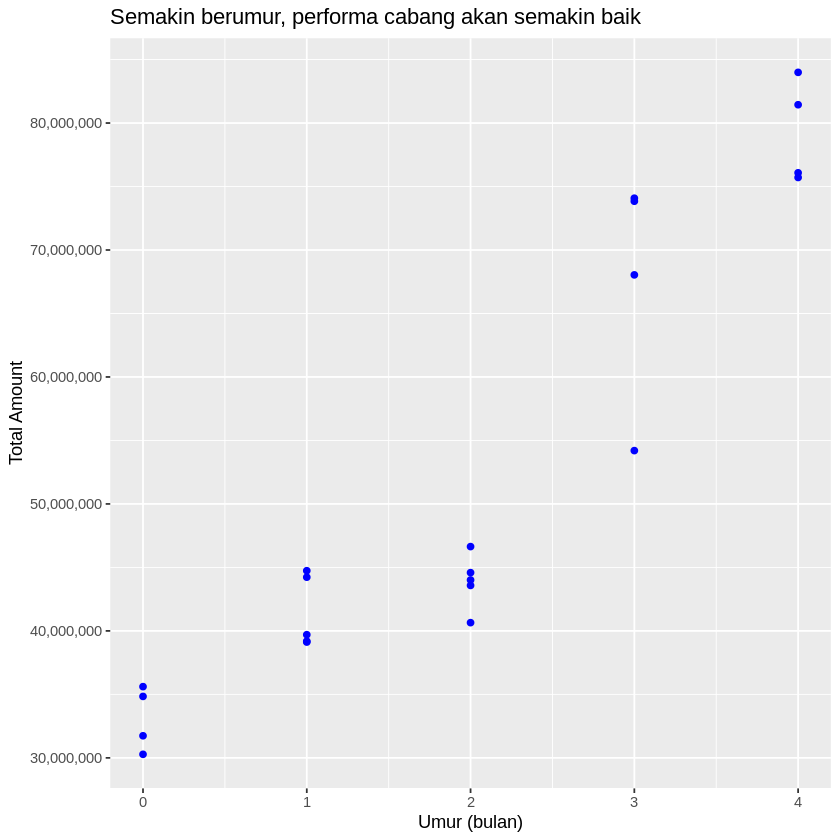

In [28]:
library(ggplot2)

ggplot(df_loan_mei_umur, aes(x = umur, y = total_amount)) +
  geom_point(color="blue") +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Semakin berumur, performa cabang akan semakin baik",
       x = "Umur (bulan)",
       y = "Total Amount")

In [31]:
library(dplyr)
library(scales)
df_loan_mei_flag <- df_loan_mei_umur %>% 
  group_by(umur) %>% 
  mutate(Q1 = quantile(total_amount, 0.25),
	   Q3 = quantile(total_amount, 0.75),
	  IQR = (Q3-Q1)) %>%
  mutate(flag = ifelse(total_amount < (Q1 - IQR), 'rendah','baik'))

df_loan_mei_flag %>% 
  filter(flag == 'rendah') %>% 
  mutate_if(is.numeric, funs(comma))

`mutate_if()` ignored the following grouping variables:
Column `umur`



cabang,pertama_cair,umur,total_amount,Q1,Q3,IQR,flag
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,2020-02-03,3,"54,200,000","64,580,000","73,900,000","9,320,000",rendah
AL,2020-03-02,2,"40,650,000","43,580,000","44,590,000","1,010,000",rendah


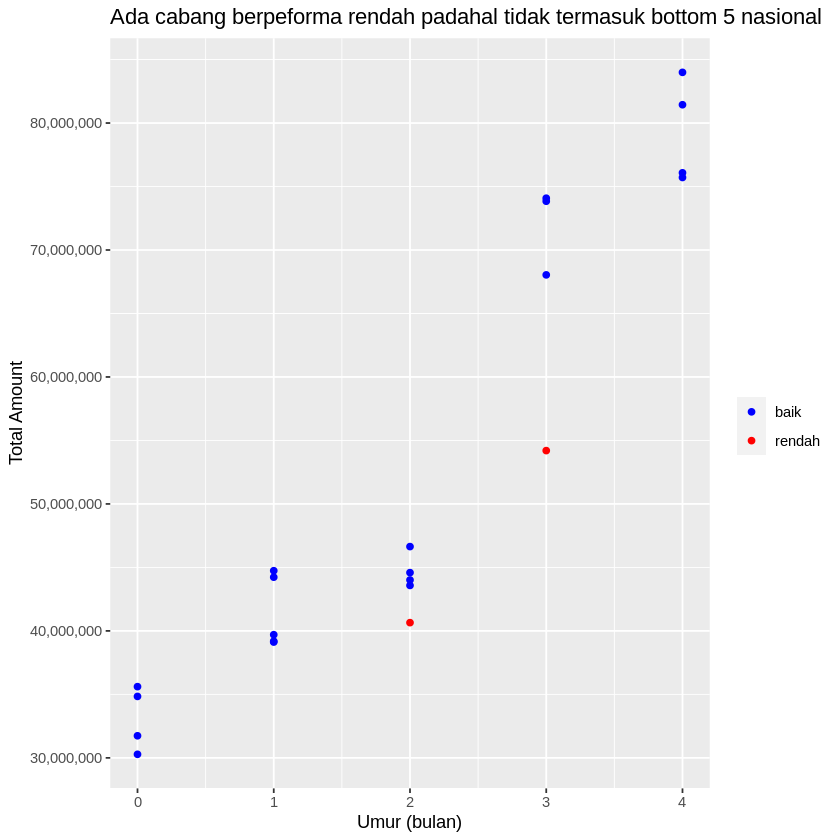

In [32]:
library(ggplot2)

ggplot(df_loan_mei_flag, aes(x = umur, y = total_amount)) +
  geom_point(aes(color = flag)) +
  scale_color_manual(breaks = c("baik", "rendah"),
                        values=c("blue", "red")) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Ada cabang berpeforma rendah padahal tidak termasuk bottom 5 nasional",
       color = "",
       x = "Umur (bulan)",
       y = "Total Amount")

In [33]:
library(dplyr)
library(scales)
df_loan_mei_flag %>% 
  filter(umur == 3) %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, flag)  %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            agen_aktif = n_distinct(agen),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,flag,jumlah_hari,agen_aktif,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,rendah,21,3,175,"309,714","54,200,000"
AF,baik,21,3,225,"302,400","68,040,000"
AH,baik,21,3,241,"306,390","73,840,000"
AG,baik,21,3,241,"307,386","74,080,000"


In [34]:
library(dplyr)
library(scales)
df_loan_mei_flag %>% 
  filter(umur == 3, flag == 'rendah') %>% 
  inner_join(df_loan, by = 'cabang') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AE,AE-3,4.0,16,"310,625","4,970,000"
AE,AE-2,18.0,73,"320,274","23,380,000"
AE,AE-1,21.0,86,"300,581","25,850,000"


In [35]:
library(dplyr)
library(scales)
df_loan %>% 
  filter(cabang == 'AH') %>% 
  filter(tanggal_cair >= '2020-05-01', tanggal_cair <= '2020-05-31') %>% 
  group_by(cabang, agen) %>% 
  summarise(jumlah_hari = n_distinct(tanggal_cair),
            total_loan_cair = n_distinct(loan_id),
            avg_amount = mean(amount), 
            total_amount = sum(amount)) %>% 
  arrange(total_amount) %>% 
  mutate_if(is.numeric, funs(comma))

`summarise()` has grouped output by 'cabang'. You can override using the `.groups` argument.

`mutate_if()` ignored the following grouping variables:
Column `cabang`



cabang,agen,jumlah_hari,total_loan_cair,avg_amount,total_amount
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AH,AH-3,19.0,74.0,"303,649","22,470,000"
AH,AH-1,21.0,81.0,"301,358","24,410,000"
AH,AH-2,21.0,86.0,"313,488","26,960,000"
